In [49]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.segmentation import random_walker
from skimage.data import binary_blobs
from skimage.exposure import rescale_intensity
import skimage

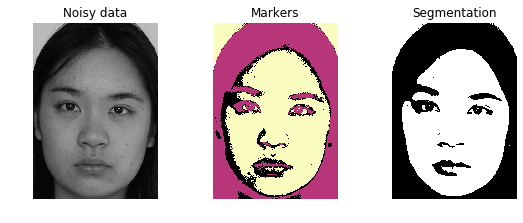

In [50]:
img = plt.imread('Dataset/FASSEG-frontal01/Train_RGB/1.bmp')
img = skimage.color.rgb2gray(img)

markers = np.zeros(img.shape, dtype=np.uint)
markers[img < 0.3] = 1
markers[img > 0.4] = 2

# Run random walker algorithm
labels = random_walker(img, markers, beta=30, mode='bf')

# Plot results
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8, 3.2),
                                    sharex=True, sharey=True)
ax1.imshow(img, cmap='gray')
ax1.axis('off')
ax1.set_title('Noisy data')
ax2.imshow(markers, cmap='magma')
ax2.axis('off')
ax2.set_title('Markers')
ax3.imshow(labels, cmap='gray')
ax3.axis('off')
ax3.set_title('Segmentation')

fig.tight_layout()
plt.show()

# Floby

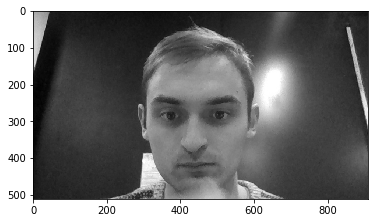

In [51]:
img = plt.imread('Dataset/floby.png')
img = skimage.color.rgb2gray(img)
plt.imshow(img, cmap='gray')

# Try all threshold

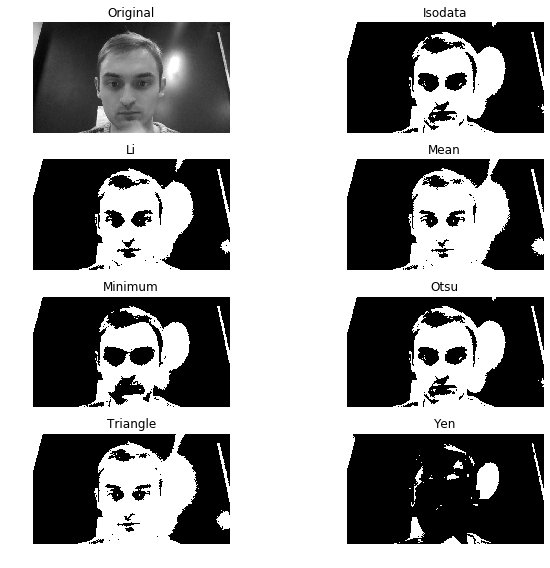

In [52]:
from skimage.filters import try_all_threshold
img = plt.imread('Dataset/floby.png')
img = skimage.color.rgb2gray(img)

fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
plt.show()

# Random Walk

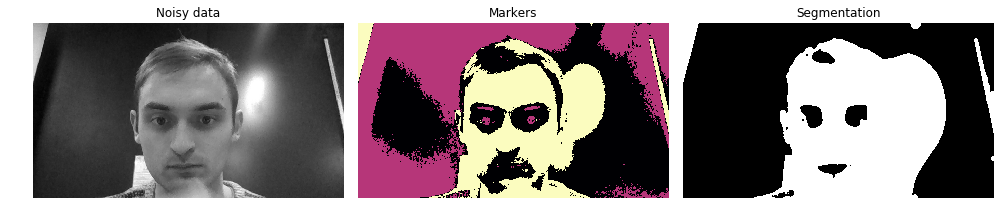

In [53]:
markers = np.zeros(img.shape, dtype=np.uint)
markers[img < 0.3] = 1
markers[img > 0.5] = 2

# Run random walker algorithm
labels = random_walker(img, markers, beta=30, mode='bf')

# Plot results
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 5),
                                    sharex=True, sharey=True)
ax1.imshow(img, cmap='gray')
ax1.axis('off')
ax1.set_title('Noisy data')
ax2.imshow(markers, cmap='magma')
ax2.axis('off')
ax2.set_title('Markers')
ax3.imshow(labels, cmap='gray')
ax3.axis('off')
ax3.set_title('Segmentation')

fig.tight_layout()
plt.show()

# Otsu

<Figure size 1296x432 with 0 Axes>

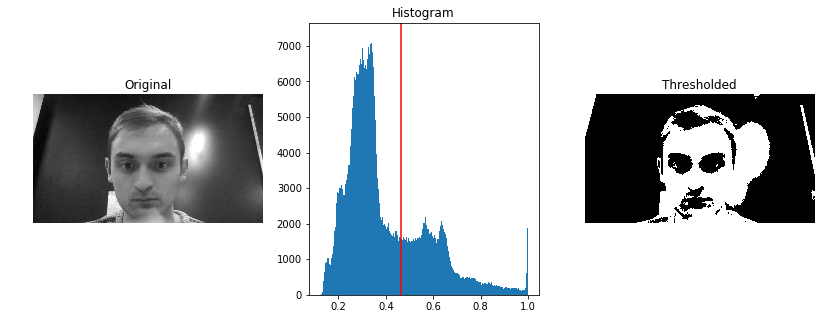

In [54]:
## try on the coin image
from skimage.filters import threshold_otsu

plt.figure(figsize=(18,6))
image = img
thresh = threshold_otsu(image)
binary = image > thresh

fig, axes = plt.subplots(ncols=3, figsize=(14, 5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

# Edge detection

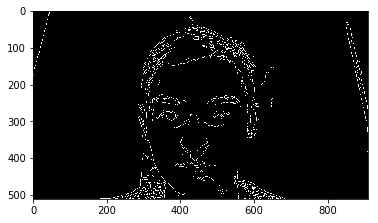

In [55]:
def imageview(image,cmap='gray'):
    plt.figure()
    plt.imshow(image,cmap=cmap)
    plt.show()

from skimage.feature import canny
edges = canny(img)
imageview(edges)

In [48]:
from skimage.filters import sobel
from scipy import ndimage as ndi

img2 = img #[:,200:700]
markers = np.zeros(img2.shape, dtype=np.uint)
markers[img2 < 0.2] = 1
markers[img2 > 0.7] = 2
elevation_map = sobel(img2)


from skimage.morphology import watershed
segmentation = watershed(elevation_map, markers)
segmentation = ndi.binary_fill_holes(segmentation - 1)
labeled_coins, _ = ndi.label(segmentation)
## show the resulting two images
import matplotlib
randcmap = matplotlib.colors.ListedColormap ( np.random.rand ( 256,3))
imageview(labeled_coins,cmap=randcmap)

ValueError: The parameter `image` must be a 2-dimensional array

(675, 1200, 3)
Camera Matrix :
 [[1.200e+03 0.000e+00 6.000e+02]
 [0.000e+00 1.200e+03 3.375e+02]
 [0.000e+00 0.000e+00 1.000e+00]]
Rotation Vector:
 [[-0.05800198]
 [ 2.20224639]
 [ 0.01942058]]
Translation Vector:
 [[  449.51968738]
 [  -94.74161089]
 [-2343.96945188]]


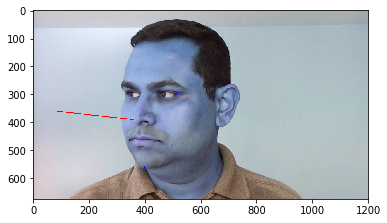

In [6]:
import cv2
import numpy as np
from time import time
t = time()
 
# Read Image
im = cv2.imread("headPose.jpg");
print(im.shape)
size = im.shape
     
#2D image points. If you change the image, you need to change vector
image_points = np.array([
                            (359, 391),     # Nose tip
                            (399, 561),     # Chin
                            (337, 297),     # Left eye left corner
                            (513, 301),     # Right eye right corne
                            (345, 465),     # Left Mouth corner
                            (453, 469)      # Right mouth corner
                        ], dtype="double")
 
# 3D model points.
model_points = np.array([
                            (0.0, 0.0, 0.0),             # Nose tip
                            (0.0, -330.0, -65.0),        # Chin
                            (-225.0, 170.0, -135.0),     # Left eye left corner
                            (225.0, 170.0, -135.0),      # Right eye right corne
                            (-150.0, -150.0, -125.0),    # Left Mouth corner
                            (150.0, -150.0, -125.0)      # Right mouth corner 
                        ])
 

# Camera internals
 
focal_length = size[1]
center = (size[1]/2, size[0]/2)
camera_matrix = np.array(
                         [[focal_length, 0, center[0]],
                         [0, focal_length, center[1]],
                         [0, 0, 1]], dtype = "double"
                         )
 
print ("Camera Matrix :\n {0}".format(camera_matrix))
 
dist_coeffs = np.zeros((4,1)) # Assuming no lens distortion
(success, rotation_vector, translation_vector) = cv2.solvePnP(model_points, image_points, camera_matrix, dist_coeffs) #flags=cv2.CV_ITERATIVE)
 
print ("Rotation Vector:\n {0}".format(rotation_vector))
print ("Translation Vector:\n {0}".format(translation_vector))
 

# Project a 3D point (0, 0, 1000.0) onto the image plane
# We use this to draw a line sticking out of the nose


nose_end_point2D, jacobian = cv2.projectPoints(np.array([(0.0, 0.0, 1000.0)]), rotation_vector, translation_vector, camera_matrix, dist_coeffs)

for p in image_points:
    cv2.circle(im, (int(p[0]), int(p[1])), 3, (0,0,255), -1)


p1 = ( int(image_points[0][0]), int(image_points[0][1]))
p2 = ( int(nose_end_point2D[0][0][0]), int(nose_end_point2D[0][0][1]))

im = cv2.line(im, p1, p2, (255,0,0), 2)
 
# Display image
plt.imshow(im)
plt.show()

In [18]:
img = plt.imread('Dataset/floby.png')
img.shape

(511, 910, 3)

# Floby de face

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(511, 910, 3)
Camera Matrix :
 [[910.    0.  455. ]
 [  0.  910.  255.5]
 [  0.    0.    1. ]]
Rotation Vector:
 [[-3.06521275]
 [ 0.01160925]
 [-0.00706312]]
Translation Vector:
 [[ -36.30104501]
 [ 259.969723  ]
 [2113.11430828]]


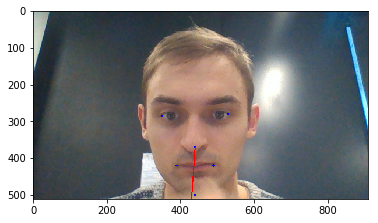

In [31]:
import cv2
import numpy as np
from time import time

img = plt.imread('Dataset/floby.png')
img.shape
 
# Read Image
im = img;
print(im.shape)
size = im.shape
     
#2D image points. If you change the image, you need to change vector
image_points = np.array([
                            (440, 370),     # Nose tip
                            (440, 500),     # Chin
                            (350, 285),     # Left eye left corner
                            (530, 280),     # Right eye right corner
                            (390, 420),     # Left Mouth corner
                            (490, 420)      # Right mouth corner
                        ], dtype="double")
 
# 3D model points.
model_points = np.array([
                            (0.0, 0.0, 0.0),             # Nose tip
                            (0.0, -330.0, -65.0),        # Chin
                            (-225.0, 170.0, -135.0),     # Left eye left corner
                            (225.0, 170.0, -135.0),      # Right eye right corne
                            (-150.0, -150.0, -125.0),    # Left Mouth corner
                            (150.0, -150.0, -125.0)      # Right mouth corner 
                        ])
 

# Camera internals
 
focal_length = size[1]
center = (size[1]/2, size[0]/2)
camera_matrix = np.array(
                         [[focal_length, 0, center[0]],
                         [0, focal_length, center[1]],
                         [0, 0, 1]], dtype = "double"
                         )
 
print ("Camera Matrix :\n {0}".format(camera_matrix))
 
dist_coeffs = np.zeros((4,1)) # Assuming no lens distortion
(success, rotation_vector, translation_vector) = cv2.solvePnP(model_points, image_points, camera_matrix, dist_coeffs) #flags=cv2.CV_ITERATIVE)
 
print ("Rotation Vector:\n {0}".format(rotation_vector))
print ("Translation Vector:\n {0}".format(translation_vector))
 

# Project a 3D point (0, 0, 1000.0) onto the image plane
# We use this to draw a line sticking out of the nose


nose_end_point2D, jacobian = cv2.projectPoints(np.array([(0.0, 0.0, 1000.0)]), rotation_vector, translation_vector, camera_matrix, dist_coeffs)

for p in image_points:
    cv2.circle(im, (int(p[0]), int(p[1])), 3, (0,0,255), -1)


p1 = ( int(image_points[0][0]), int(image_points[0][1]))
p2 = ( int(nose_end_point2D[0][0][0]), int(nose_end_point2D[0][0][1]))

im = cv2.line(im, p1, p2, (255,0,0), 2)
 
# Display image
plt.imshow(im)
plt.show()

# Floby de côté

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(620, 1103, 3)
Camera Matrix :
 [[1.103e+03 0.000e+00 5.515e+02]
 [0.000e+00 1.103e+03 3.100e+02]
 [0.000e+00 0.000e+00 1.000e+00]]
Rotation Vector:
 [[-3.04379902]
 [-0.15040965]
 [-1.08212521]]
Translation Vector:
 [[ 267.03813847]
 [ 135.00987464]
 [2957.26151453]]


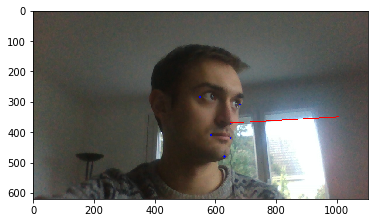

In [47]:
import cv2
import numpy as np
from time import time

img = plt.imread('Dataset/Floby_r.png')
img.shape
 
# Read Image
im = img;
print(im.shape)
size = im.shape
     
#2D image points. If you change the image, you need to change vector
image_points = np.array([
                            (650, 370),     # Nose tip
                            (630, 480),     # Chin
                            (550, 285),     # Left eye left corner
                            (680, 310),     # Right eye right corner
                            (585, 410),     # Left Mouth corner
                            (650, 420)      # Right mouth corner
                        ], dtype="double")
 
# 3D model points.
model_points = np.array([
                            (0.0, 0.0, 0.0),             # Nose tip
                            (0.0, -330.0, -65.0),        # Chin
                            (-225.0, 170.0, -135.0),     # Left eye left corner
                            (225.0, 170.0, -135.0),      # Right eye right corne
                            (-150.0, -150.0, -125.0),    # Left Mouth corner
                            (150.0, -150.0, -125.0)      # Right mouth corner 
                        ])
 

# Camera internals
 
focal_length = size[1]
center = (size[1]/2, size[0]/2)
camera_matrix = np.array(
                         [[focal_length, 0, center[0]],
                         [0, focal_length, center[1]],
                         [0, 0, 1]], dtype = "double"
                         )
 
print ("Camera Matrix :\n {0}".format(camera_matrix))
 
dist_coeffs = np.zeros((4,1)) # Assuming no lens distortion
success, rotation_vector, translation_vector = cv2.solvePnP(model_points, image_points, camera_matrix, dist_coeffs)
 
print ("Rotation Vector:\n {0}".format(rotation_vector))
print ("Translation Vector:\n {0}".format(translation_vector))
 

# Project a 3D point (0, 0, 1000.0) onto the image plane
# We use this to draw a line sticking out of the nose


nose_end_point2D, jacobian = cv2.projectPoints(np.array([(0.0, 0.0, 1000.0)]), rotation_vector, translation_vector, camera_matrix, dist_coeffs)

for p in image_points:
    cv2.circle(im, (int(p[0]), int(p[1])), 3, (0,0,255), -1)


p1 = ( int(image_points[0][0]), int(image_points[0][1]))
p2 = ( int(nose_end_point2D[0][0][0]), int(nose_end_point2D[0][0][1]))

im = cv2.line(im, p1, p2, (255,0,0), 2)
 
# Display image
plt.imshow(im)
plt.show()